# von Mises Failure Theory Plots

- The von Mises criterion states that failure occurs when the energy of distortion reaches the same energy <br> for yield/failure in uniaxial tension. 
- von Mises criterion gives a reasonable estimation of fatigue failure, especially in cases of repeated tensile <br> and tensile-shear loading.

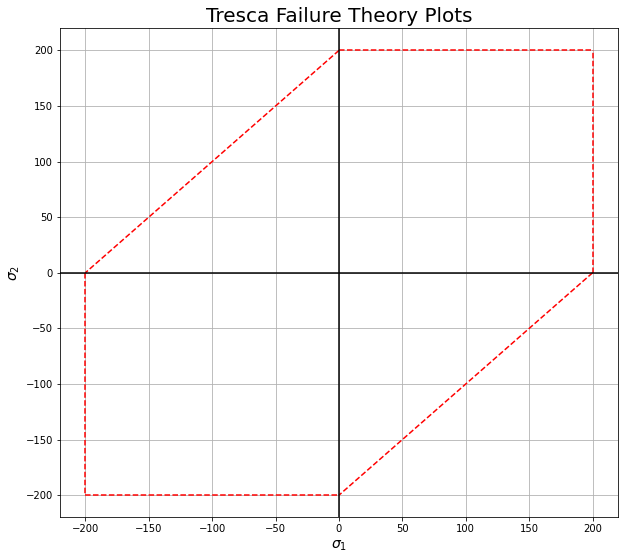

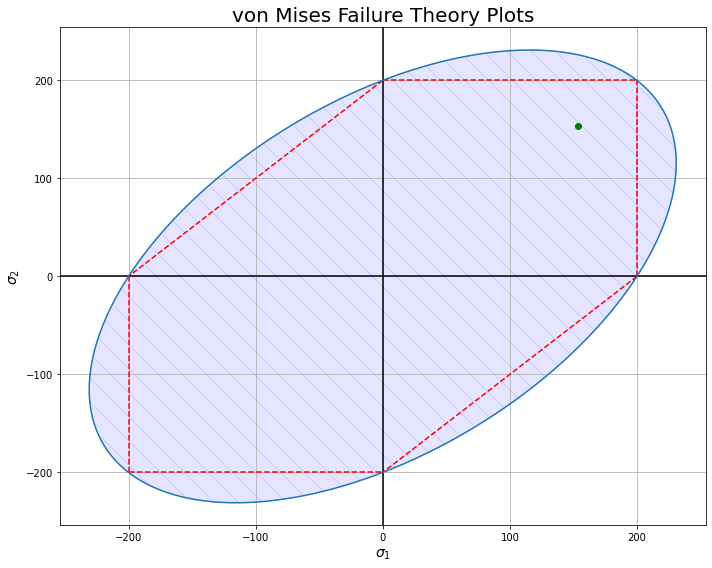

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# inputs
sy = 200  # yeild strength (降伏応力) [MPa]
s1 = 125  # principal stress 1, s1 (主応力) [MPa]
s2 = 90   # principal stress 2, s2 (主応力) [MPa]

class MaterialFailure():
    def __init__(self,sy,s1,s2):
        ''' INPUT INITIAL INFORMATION
                σ_y : sigma y
                σ_1 : sigma 1
                σ_2 : sigma 2
        '''
        self.sy = sy
        self.s1 = s1
        self.s2 = s2

    def TrescaCriterionPlot(self):
        plt.figure(figsize=(10,9))
        plt.title("Tresca Failure Theory Plots",fontsize=20)
        plt.xlabel(r'$\sigma_1$',fontsize=14)
        plt.ylabel(r'$\sigma_2$',fontsize=14)
        # plot dashed line for maximum shear stress criterion (Tresca yield criterion)
        plt.plot([self.sy,self.sy],[0,sy],'r--')
        plt.plot([0,self.sy],[self.sy,self.sy],'r--')
        plt.plot([-self.sy,0],[-self.sy,-self.sy],'r--')
        plt.plot([-self.sy,-self.sy],[0,-self.sy],'r--')
        plt.plot([0,-self.sy],[self.sy,0],'r--')
        plt.plot([self.sy,0],[0,-self.sy],'r--')

        plt.axhline(color = 'k')
        plt.axvline(color = 'k')
        plt.grid()
        plt.show()

    def vonMisesCriterionPlot(self):
        s_von = np.sqrt(self.s1**2 + self.s2**2 -(self.s1-self.s2))

        a = np.sqrt(2)*self.sy
        b = np.sqrt(2/3)*self.sy

        alpha = np.linspace(0,2*np.pi,360)
        theta = np.pi/4 # 45degree

        #--before rotation matrix--#
        # x = a*np.cos(alpha)
        # y = b*np.sin(alpha)

        #--after rotation matrix--#
        x = (a*np.cos(alpha)*np.cos(theta)) - (b*np.sin(alpha)*np.sin(theta))
        y = (a*np.cos(alpha)*np.sin(theta)) + (b*np.sin(alpha)*np.cos(theta))

        # set graph size
        plt.figure(figsize=(10,8))
        plt.title("von Mises Failure Theory Plots",fontsize=20)
        plt.xlabel(r'$\sigma_1$',fontsize=14)
        plt.ylabel(r'$\sigma_2$',fontsize=14)

        plt.fill_between(x,y,color='blue',hatch='\\',alpha=0.1)

        # plot dashed line for maximum shear stress criterion (Tresca yield criterion)
        plt.plot([self.sy,self.sy],[0,sy],'r--')
        plt.plot([0,self.sy],[self.sy,self.sy],'r--')
        plt.plot([-self.sy,0],[-self.sy,-self.sy],'r--')
        plt.plot([-self.sy,-self.sy],[0,-self.sy],'r--')
        plt.plot([0,-self.sy],[self.sy,0],'r--')
        plt.plot([self.sy,0],[0,-self.sy],'r--')

        # Create horizontal and vertical lines at center
        plt.axhline(color = 'k')
        plt.axvline(color = 'k')

        # check if von Mises stress in the region
        plt.scatter(s_von,s_von,color = 'g')
        # show gridline
        plt.grid()
        plt.tight_layout()
        plt.plot(x,y)
        plt.show()

if __name__ == '__main__':
    x = MaterialFailure(sy,s1,s2) 
    x.TrescaCriterionPlot()
    x.vonMisesCriterionPlot()

### Reference :
1. [Failure Criteria](https://www.efunda.com/formulae/solid_mechanics/failure_criteria/failure_criteria_ductile.cfm#:~:text=The%20von%20Mises%20criterion%20states,stress%2C%20s3%20%3D%200.&text=Also%20shown%20on%20the%20figure,stress%20criterion%20(dashed%20line).)
2. [Strength of Materials and Failure Theories](https://web.cecs.pdx.edu/~far/me493/Strength%20of%20Materials%20and%20Failure%20Theories%202013.pdf)
3. [Rotation matrix](https://www.brainm.com/software/pubs/math/Rotation_matrix.pdf)
4. [Ellipses](https://saylordotorg.github.io/text_intermediate-algebra/s11-03-ellipses.html#:~:text=The%20equation%20of%20an%20ellipse%20written%20in%20the%20form%20(x,where%20p%2Cq%3E0.)